# Fetch data with PythonLidar

## Imports

In [1]:
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
from python_lidar import PythonLidar
pl = PythonLidar(epsg=4326)

2021-08-23 12:00:53,289 — FileHandler — INFO — usgs_3dep_metadata read successfully


## Fetch USGS 3DEP Lidar data

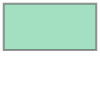

In [9]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.754155, 41.919015]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
polygon

In [10]:
gdf = pl.fetch_lidar(polygon, ["IA_FullState"])
gdf

         filename        region  year        xmin        xmax       ymin  \
227  IA_FullState  IA_FullState   NaN -10758075.0 -10034133.0  4793202.0   

          ymax        points  
227  5517144.0  167692896718  
2021-08-23 12:02:01,552 — FileHandler — INFO — usgs_3dep_pipeline read successfully
2021-08-23 12:02:01,552 — FileHandler — INFO — usgs_3dep_pipeline read successfully
2021-08-23 12:02:42,445 — GetData — INFO — successfully read geodata: IA_FullState_-10436887.43333523_-10436664.794353643_5148706.389047223_5148855.992775583


[{'year': nan,
  'region': 'IA_FullState',
  'geo_data':        elevation                    geometry
  0         313.19  POINT (-93.75497 41.91872)
  1         313.18  POINT (-93.75499 41.91872)
  2         313.05  POINT (-93.75500 41.91872)
  3         312.92  POINT (-93.75501 41.91872)
  4         313.03  POINT (-93.75504 41.91872)
  ...          ...                         ...
  22987     311.60  POINT (-93.75526 41.91819)
  22988     310.47  POINT (-93.75586 41.91820)
  22989     310.53  POINT (-93.75606 41.91819)
  22990     311.29  POINT (-93.75526 41.91804)
  22991     310.78  POINT (-93.75547 41.91804)
  
  [22992 rows x 2 columns]}]

In [11]:
df = gdf[0]['geo_data'].copy()

In [12]:
vis = pl.get_renderer(df)

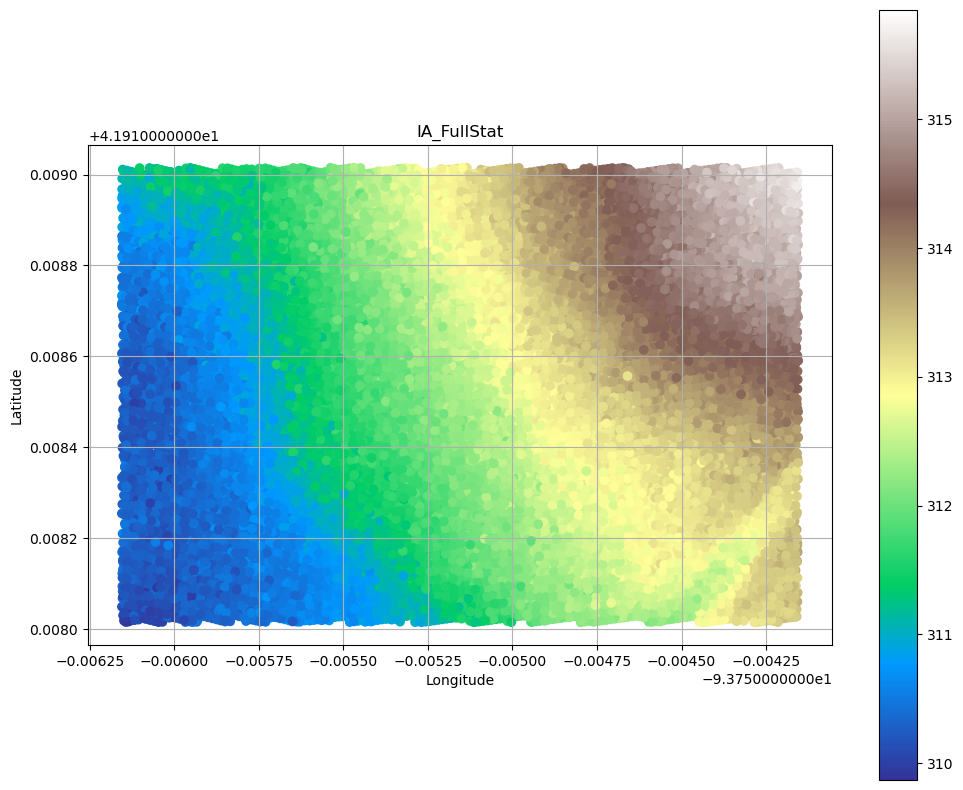

In [13]:
vis.plot_heatmap("IA_FullStat")


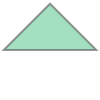

In [4]:
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.754155, 41.919015]
CENT_X = (MAXX - MINX)/2+MINX
CENT_Y = (MAXY - MINY)/2+MINY
polygon = Polygon(((MINX, MINY), (CENT_X, MAXY), (MAXX, MINY), (MINX, MINY)))
polygon


In [5]:
gdf = pl.fetch_lidar(polygon, ["IA_FullState"])
gdf

         filename        region  year        xmin        xmax       ymin  \
227  IA_FullState  IA_FullState   NaN -10758075.0 -10034133.0  4793202.0   

          ymax        points  
227  5517144.0  167692896718  
2021-08-23 12:01:08,101 — FileHandler — INFO — usgs_3dep_pipeline read successfully
2021-08-23 12:01:08,101 — FileHandler — INFO — usgs_3dep_pipeline read successfully
2021-08-23 12:01:42,021 — GetData — INFO — successfully read geodata: IA_FullState_-10436887.43333523_-10436664.794353643_5148706.389047223_5148855.992775583


[{'year': nan,
  'region': 'IA_FullState',
  'geo_data':        elevation                    geometry
  0         312.71  POINT (-93.75508 41.91871)
  1         312.78  POINT (-93.75507 41.91871)
  2         312.86  POINT (-93.75505 41.91871)
  3         312.82  POINT (-93.75504 41.91871)
  4         312.89  POINT (-93.75503 41.91871)
  ...          ...                         ...
  11522     311.97  POINT (-93.75493 41.91803)
  11523     311.99  POINT (-93.75494 41.91803)
  11524     312.10  POINT (-93.75497 41.91803)
  11525     312.09  POINT (-93.75495 41.91803)
  11526     310.66  POINT (-93.75577 41.91813)
  
  [11527 rows x 2 columns]}]

In [6]:
df = gdf[0]['geo_data'].copy()

In [7]:
vis = pl.get_renderer(df)

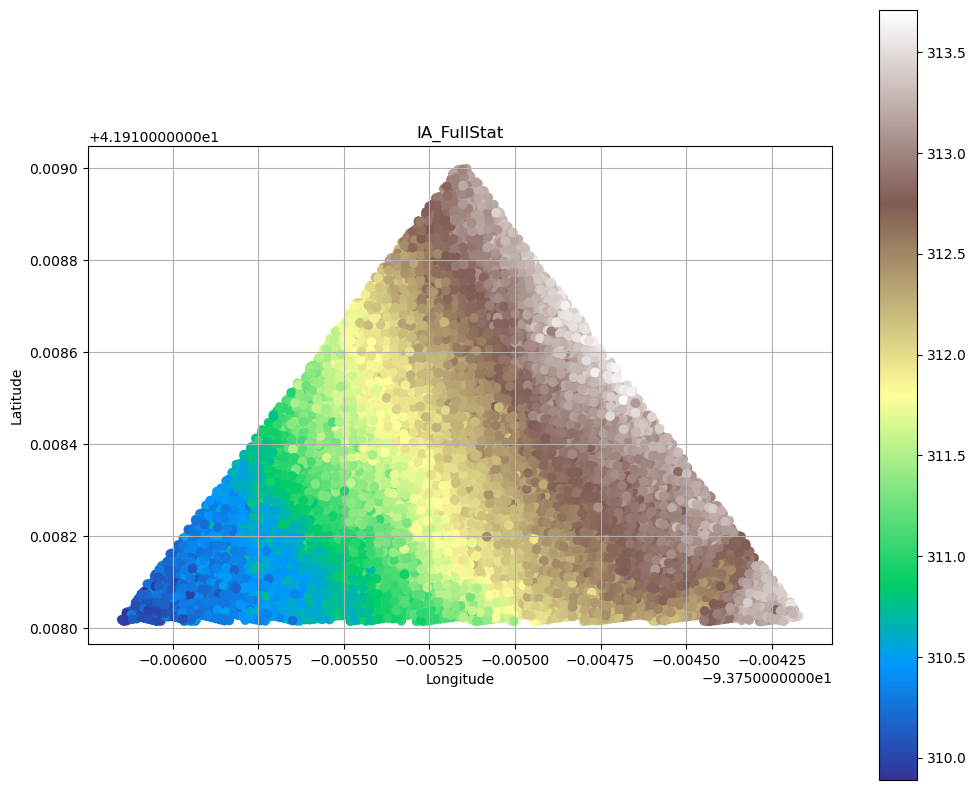

In [8]:
vis.plot_heatmap("IA_FullStat")
